## Section 0: Ong Song Yi

## Section 1: SAT/ACT scores in the US - Admission to College

## Section 2: Project Definition

### Goals:
We are taking on the persona of academia specialist and our goal is to identify states with growth potential in private tuition of ACT/SAT scores to gain admission to college.

### Dataset:
 - The majority of data is provided to for us, trended SAT/ACT scores from 2017 to 2019, inclusive.
 - We have supplemented this data for us by scouring the internet for a trended GDP per capital by state from the same time period, this is the source: https://apps.bea.gov/iTable/iTable.cfm?acrdn=1&isuri=1&reqid=70&step=1#acrdn=1&isuri=1&reqid=70&step=1
 - Amongst all the data, there are a total of 51 states available for analysis.
 - The fields and their data types are:
 
| Field Name   | Data Type |
|----------------:|:-----------------:|
| State    |  String |
| Participation |  String |
| Composite |  Integer |
| Total |  Integer |

### Tasks:

1) Explore the data.
<br>
2) Data cleaning.
<br>
3) Merging all the data into 1 dataframe.
<br>
4) Data visualisation to look into trends.
<br>
5) Conclusion.

## Section 3: Data Exploration / Data Cleaning

* Explore the data
    * Observe the data if it is fit for analysis
* Data Cleaning
    * Any oddities with the data must be cleaned

## Datasets Directory:

- [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
- [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
- [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
- [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
- [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
- [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

In [81]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
act_2017 = pd.read_csv('..\\data\\act_2017.csv')
act_2018 = pd.read_csv('..\\data\\act_2018.csv')
act_2019 = pd.read_csv('..\\data\\act_2019.csv')
act_2019_ca = pd.read_csv('..\\data\\act_2019_ca.csv')
sat_2017 = pd.read_csv('..\\data\\sat_2017.csv')
sat_2018 = pd.read_csv('..\\data\\sat_2018.csv')
sat_2019 = pd.read_csv('..\\data\\sat_2019.csv')
sat_2019_ca = pd.read_csv('..\\data\\sat_2019_ca.csv')
sat_2019_by_intended_college_major = pd.read_csv('..\\data\\sat_2019_by_intended_college_major.csv')
sat_act_by_college = pd.read_csv('..\\data\\sat_act_by_college.csv')
trended_gdp_per_capita_by_state = pd.read_csv('..\\data\\download.csv', header=4)

In [83]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [84]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

## Participation Rate
Participation rate right now is an object instead of an integer which it should be

To solve the issue, we define a new function that will convert the object to an integer

## Dropping of rows

Row 51, National is the statistics for the United States as a whole and this data is redundant as we are deep diving into individual states.

In [85]:
#Change percentage (object) to int/float
def percent_to_int(x):
    return int(x.strip('%'))

act_2019['Participation'] = act_2019['Participation'].apply(percent_to_int)

In [86]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100,18.9
1,Alaska,38,20.1
2,Arizona,73,19.0
3,Arkansas,100,19.3
4,California,23,22.6


In [87]:
clean_act_2019 = act_2019.drop(51, axis = 0)

In [88]:
clean_act_2019

,State,Participation,Composite
0,Alabama,100,18.9
1,Alaska,38,20.1
2,Arizona,73,19.0
3,Arkansas,100,19.3
4,California,23,22.6
5,Colorado,27,23.8
6,Connecticut,22,25.5
7,Delaware,13,24.1
8,District of Columbia,32,23.5
9,Florida,54,20.1


In [89]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [90]:
# To make sure row is numeric
replaced = sat_2019['Participation Rate'].replace('—', '0')
sat_2019['Participation Rate'] = replaced.apply(percent_to_int) # To make sure row is numeric
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7,583,560,1143
1,Alaska,41,556,541,1097
2,Arizona,31,569,565,1134
3,Arkansas,6,582,559,1141
4,California,63,534,531,1065


In [91]:
sat_2019_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [92]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [93]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


## Exploring external data

In [94]:
trended_gdp_per_capita_by_state.head()

,GeoFips,GeoName,2017,2018,2019
0,00000,United States,51573.0,53817.0,55724.0
1,01000,Alabama,40252.0,41607.0,43157.0
2,02000,Alaska *,57278.0,59783.0,61639.0
3,04000,Arizona,43301.0,45299.0,47242.0
4,05000,Arkansas,42056.0,43661.0,45037.0


In [95]:
trended_gdp_per_capita_by_state.tail(10)

,GeoFips,GeoName,2017,2018,2019
55,94000,Plains,49359.0,51419.0,52969.0
56,95000,Southeast,45748.0,47633.0,49414.0
57,96000,Southwest,47278.0,49815.0,51449.0
58,97000,Rocky Mountain,49534.0,52220.0,54605.0
59,98000,Far West,56991.0,59627.0,62262.0
60,Legend / Footnotes:,NaN,NaN,NaN,NaN
61,2/ Per capita personal income is total persona...,NaN,NaN,NaN,NaN
62,* Estimates prior to 1950 are not available fo...,NaN,NaN,NaN,NaN
63,Note. All dollar estimates are in millions of ...,NaN,NaN,NaN,NaN
64,"Last updated: March 23, 2022—preliminary stati...",NaN,NaN,NaN,NaN


In [96]:
trended_gdp_per_capita_by_state.head()

,GeoFips,GeoName,2017,2018,2019
0,00000,United States,51573.0,53817.0,55724.0
1,01000,Alabama,40252.0,41607.0,43157.0
2,02000,Alaska *,57278.0,59783.0,61639.0
3,04000,Arizona,43301.0,45299.0,47242.0
4,05000,Arkansas,42056.0,43661.0,45037.0


In [97]:
trended_gdp_per_capita_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFips  65 non-null     object 
 1   GeoName  60 non-null     object 
 2   2017     60 non-null     float64
 3   2018     60 non-null     float64
 4   2019     60 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.7+ KB


## External data issues

1) Column names are not appropriate - Solution: Rename column names to equal Internal data
<br>
<br>
2) Some column(s)/rows are unnecessary - Solution: drop unnecessary column(s) / rows(s)
<br>
<br>
3) Some states have a * at the end of their name - Solution: Access single value respective state and rename them

In [98]:
# Dropping rows that have missing value
trended_gdp_per_capita_by_state.dropna(inplace=True)
trended_gdp_per_capita_by_state.tail(10)

,GeoFips,GeoName,2017,2018,2019
50,55000,Wisconsin,48741.0,50818.0,52417.0
51,56000,Wyoming,57126.0,60353.0,61571.0
52,91000,New England,63109.0,65737.0,67996.0
53,92000,Mideast,59717.0,61927.0,63788.0
54,93000,Great Lakes,48407.0,50503.0,52069.0
55,94000,Plains,49359.0,51419.0,52969.0
56,95000,Southeast,45748.0,47633.0,49414.0
57,96000,Southwest,47278.0,49815.0,51449.0
58,97000,Rocky Mountain,49534.0,52220.0,54605.0
59,98000,Far West,56991.0,59627.0,62262.0


In [99]:
# Dropping the column 'GeoFips' as it is irrelevant
trended_gdp_per_capita_by_state.drop('GeoFips', axis=1, inplace=True)
trended_gdp_per_capita_by_state.head()

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska *,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [100]:
# Removing * from Alaska
trended_gdp_per_capita_by_state.at[2, 'GeoName'] = 'Alaska'
trended_gdp_per_capita_by_state.head()

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [101]:
# Removing * from Hawaii
trended_gdp_per_capita_by_state.head(13)
trended_gdp_per_capita_by_state.at[12, 'GeoName'] = 'Hawaii'
trended_gdp_per_capita_by_state.head(13)

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0
6,Colorado,55294.0,58471.0,61087.0
7,Connecticut,70163.0,73176.0,74930.0
8,Delaware,50516.0,52839.0,53539.0
9,District of Columbia,79967.0,82512.0,83270.0


In [102]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


## Renaming columns of data to prepare for data merger

In [103]:
trended_gdp_per_capita_by_state.rename(columns={'GeoName':'State',
                                               '2017': 'GDP Per Capita (2017)',
                                               '2018': 'GDP Per Capita (2018)',
                                               '2019': 'GDP Per Capita (2019)'}, 
                                                inplace=True)
trended_gdp_per_capita_by_state.head()

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [104]:
trended_gdp_per_capita_by_state.at[0, 'State'] = 'National'

In [105]:
trended_gdp_per_capita_by_state.sort_values('State', axis=0).head()

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0


## Merging all the data into 1 dataframe

In [106]:
act_2017 = act_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0


## Data Merging Issues

During data merger, we realised there were more data issues

1) Some scores do not tally
<br>
2) Some column(s) are not the correct data type
<br>
3) Lower-case letter in state(s) caused the state(s) to be dropped during merger

In [107]:
# Notice in row 51, Composite is 20.2x, also in Notice in row 21, Science score is 2.3 but this source: 
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf states 23.2
act_2017

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0
5,California,31%,22.5,22.7,23.1,22.2,22.8,58813.0,61509.0,64333.0
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,55294.0,58471.0,61087.0
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,70163.0,73176.0,74930.0
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,50516.0,52839.0,53539.0
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,79967.0,82512.0,83270.0


In [108]:
# Change value in row 51, Composite (2017) (ACT) to 20.2x
act_2017.at[51, 'Composite'] = 20.2
act_2017.at[21, 'Science'] = 23.2
act_2017

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0
5,California,31%,22.5,22.7,23.1,22.2,22.8,58813.0,61509.0,64333.0
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,55294.0,58471.0,61087.0
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,70163.0,73176.0,74930.0
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,50516.0,52839.0,53539.0
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,79967.0,82512.0,83270.0


In [109]:
# Due to the presence of a string in the column 'Composite' , the column is an object
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  52 non-null     object 
 1   Participation          52 non-null     object 
 2   English                52 non-null     float64
 3   Math                   52 non-null     float64
 4   Reading                52 non-null     float64
 5   Science                52 non-null     float64
 6   Composite              52 non-null     object 
 7   GDP Per Capita (2017)  52 non-null     float64
 8   GDP Per Capita (2018)  52 non-null     float64
 9   GDP Per Capita (2019)  52 non-null     float64
dtypes: float64(7), object(3)
memory usage: 6.5+ KB


In [110]:
# Changing the column 'Composite' from object to float
act_2017['Composite'] = act_2017['Composite'].astype(float)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  52 non-null     object 
 1   Participation          52 non-null     object 
 2   English                52 non-null     float64
 3   Math                   52 non-null     float64
 4   Reading                52 non-null     float64
 5   Science                52 non-null     float64
 6   Composite              52 non-null     float64
 7   GDP Per Capita (2017)  52 non-null     float64
 8   GDP Per Capita (2018)  52 non-null     float64
 9   GDP Per Capita (2019)  52 non-null     float64
dtypes: float64(8), object(2)
memory usage: 6.5+ KB


In [111]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0


In [112]:
# Notice in row 20, Maryland Math scores is 52 and do not tally with the total SAT scores
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [113]:
# Changing row 20, Maryland Math scores to be Total (2017) (SAT) - Evidence-Based Reading and Writing
sat_2017.at[20, 'Math'] = 1060 - 536
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [114]:
# Merging sat_2017 with trended GDP per capita by state
sat_2017 = sat_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,5%,593,572,1165,40252.0,41607.0,43157.0
1,Alaska,38%,547,533,1080,57278.0,59783.0,61639.0
2,Arizona,30%,563,553,1116,43301.0,45299.0,47242.0
3,Arkansas,3%,614,594,1208,42056.0,43661.0,45037.0
4,California,53%,531,524,1055,58813.0,61509.0,64333.0


In [115]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5%,593,572,1165,40252.0
1,Alaska,38%,547,533,1080,57278.0
2,Arizona,30%,563,553,1116,43301.0
3,Arkansas,3%,614,594,1208,42056.0
4,California,53%,531,524,1055,58813.0


In [116]:
# Notice that in row 8, the letter 'c' in 'District of columbia' is lower-case
act_2018.head(9)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6


In [117]:
# Changing the letter 'c' in 'District of columbia' from lower-case to upper-case
act_2018.at[8,'State'] = 'District of Columbia'
act_2018.head(9)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6


In [118]:
# Merging act_2018 with trended GDP per capita by state
act_2018 = act_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100%,19.1,40252.0,41607.0,43157.0
1,Alaska,33%,20.8,57278.0,59783.0,61639.0
2,Arizona,66%,19.2,43301.0,45299.0,47242.0
3,Arkansas,100%,19.4,42056.0,43661.0,45037.0
4,California,27%,22.7,58813.0,61509.0,64333.0


In [119]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2018)
0,Alabama,100%,19.1,41607.0
1,Alaska,33%,20.8,59783.0
2,Arizona,66%,19.2,45299.0
3,Arkansas,100%,19.4,43661.0
4,California,27%,22.7,61509.0


In [120]:
# Merging sat_2018 with trended GDP per capita by state
sat_2018 = sat_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,6%,595,571,1166,40252.0,41607.0,43157.0
1,Alaska,43%,562,544,1106,57278.0,59783.0,61639.0
2,Arizona,29%,577,572,1149,43301.0,45299.0,47242.0
3,Arkansas,5%,592,576,1169,42056.0,43661.0,45037.0
4,California,60%,540,536,1076,58813.0,61509.0,64333.0


In [121]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6%,595,571,1166,41607.0
1,Alaska,43%,562,544,1106,59783.0
2,Arizona,29%,577,572,1149,45299.0
3,Arkansas,5%,592,576,1169,43661.0
4,California,60%,540,536,1076,61509.0


In [122]:
# Merging act_2019 with trended GDP per capita by state
act_2019 = act_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100,18.9,40252.0,41607.0,43157.0
1,Alaska,38,20.1,57278.0,59783.0,61639.0
2,Arizona,73,19.0,43301.0,45299.0,47242.0
3,Arkansas,100,19.3,42056.0,43661.0,45037.0
4,California,23,22.6,58813.0,61509.0,64333.0


In [123]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2019)
0,Alabama,100,18.9,43157.0
1,Alaska,38,20.1,61639.0
2,Arizona,73,19.0,47242.0
3,Arkansas,100,19.3,45037.0
4,California,23,22.6,64333.0


In [124]:
# Merging sat_2019 with trended GDP per capita by state
sat_2019 = sat_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,7,583,560,1143,40252.0,41607.0,43157.0
1,Alaska,41,556,541,1097,57278.0,59783.0,61639.0
2,Arizona,31,569,565,1134,43301.0,45299.0,47242.0
3,Arkansas,6,582,559,1141,42056.0,43661.0,45037.0
4,California,63,534,531,1065,58813.0,61509.0,64333.0


In [125]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [126]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0


In [127]:
def percent_to_int(x):
    return int(x.strip('%'))

In [128]:
# Converting the Participation column to integer
act_2017['Participation'] = act_2017['Participation'].apply(percent_to_int)

In [129]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5%,593,572,1165,40252.0
1,Alaska,38%,547,533,1080,57278.0
2,Arizona,30%,563,553,1116,43301.0
3,Arkansas,3%,614,594,1208,42056.0
4,California,53%,531,524,1055,58813.0


In [130]:
# Converting the Participation column to integer
sat_2017['Participation'] = sat_2017['Participation'].apply(percent_to_int)

In [131]:
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2018)
0,Alabama,100%,19.1,41607.0
1,Alaska,33%,20.8,59783.0
2,Arizona,66%,19.2,45299.0
3,Arkansas,100%,19.4,43661.0
4,California,27%,22.7,61509.0


In [132]:
# Converting the Participation column to integer
act_2018['Participation'] = act_2018['Participation'].apply(percent_to_int)

In [133]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6%,595,571,1166,41607.0
1,Alaska,43%,562,544,1106,59783.0
2,Arizona,29%,577,572,1149,45299.0
3,Arkansas,5%,592,576,1169,43661.0
4,California,60%,540,536,1076,61509.0


In [134]:
# Converting the Participation column to integer
sat_2018['Participation'] = sat_2018['Participation'].apply(percent_to_int)

In [135]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,42056.0


In [136]:
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2019)
0,Alabama,100,18.9,43157.0
1,Alaska,38,20.1,61639.0
2,Arizona,73,19.0,47242.0
3,Arkansas,100,19.3,45037.0
4,California,23,22.6,64333.0


In [137]:
#Rename columns to denote the year before merging the dataframes for ACT
act_2017.rename(columns = {'Participation': 'Participation (2017) (ACT)',
                          'Composite': 'Composite (2017) (ACT)'},
                          inplace=True)

act_2018.rename(columns = {'Participation': 'Participation (2018) (ACT)',
                          'Composite': 'Composite (2018) (ACT)'},
                          inplace=True)

act_2019.rename(columns = {'Participation': 'Participation (2019) (ACT)',
                          'Composite': 'Composite (2019) (ACT)'},
                          inplace=True)

In [138]:
#Merging all ACT files
act_merged = pd.merge(act_2017, act_2018, on='State').drop(['English', 'Math', 'Reading', 'Science'], axis=1)
act_merged = pd.merge(act_merged, act_2019, on='State')
act_merged = act_merged[['State','Participation (2017) (ACT)', 'Participation (2018) (ACT)', 'Participation (2019) (ACT)',
                        'Composite (2017) (ACT)', 'Composite (2018) (ACT)', 'Composite (2019) (ACT)',
                        'GDP Per Capita (2017)', 'GDP Per Capita (2018)', 'GDP Per Capita (2019)']]
act_merged.head()

,State,Participation (2017) (ACT),Participation (2018) (ACT),Participation (2019) (ACT),Composite (2017) (ACT),Composite (2018) (ACT),Composite (2019) (ACT),GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0


In [139]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5,593,572,1165,40252.0
1,Alaska,38,547,533,1080,57278.0
2,Arizona,30,563,553,1116,43301.0
3,Arkansas,3,614,594,1208,42056.0
4,California,53,531,524,1055,58813.0


In [140]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6,595,571,1166,41607.0
1,Alaska,43,562,544,1106,59783.0
2,Arizona,29,577,572,1149,45299.0
3,Arkansas,5,592,576,1169,43661.0
4,California,60,540,536,1076,61509.0


In [141]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [142]:
#Rename columns to denote the year before merging the dataframes for SAT
sat_2017.rename(columns={'Participation': 'Participation (2017) (SAT)',
                        'Total': 'Total (2017) (SAT)'},
                         inplace=True)

sat_2018.rename(columns={'Participation': 'Participation (2018) (SAT)',
                        'Total': 'Total (2018) (SAT)'},
                         inplace=True)

sat_2019.rename(columns={'Participation Rate': 'Participation (2019) (SAT)',
                        'Total': 'Total (2019) (SAT)'},
                         inplace=True)

In [143]:
#Merging all SAT files
sat_merged = pd.merge(sat_2017, sat_2018, on='State')
sat_merged = pd.merge(sat_merged, sat_2019, on='State').drop(['Evidence-Based Reading and Writing_x',
                                                             'Math_x',
                                                             'Evidence-Based Reading and Writing_y',
                                                             'Math_y',
                                                             'EBRW',
                                                             'Math'], axis=1)

sat_merged = sat_merged[['State',
                        'Participation (2017) (SAT)', 'Participation (2018) (SAT)', 'Participation (2019) (SAT)',
                        'Total (2017) (SAT)', 'Total (2018) (SAT)', 'Total (2019) (SAT)']]
sat_merged.head()

,State,Participation (2017) (SAT),Participation (2018) (SAT),Participation (2019) (SAT),Total (2017) (SAT),Total (2018) (SAT),Total (2019) (SAT)
0,Alabama,5,6,7,1165,1166,1143
1,Alaska,38,43,41,1080,1106,1097
2,Arizona,30,29,31,1116,1149,1134
3,Arkansas,3,5,6,1208,1169,1141
4,California,53,60,63,1055,1076,1065


In [144]:
#Merging SAT and ACT, renaming  and re-ordering columns
act_sat_merged = pd.merge(act_merged, sat_merged, on='State')
act_sat_merged.rename(columns = {'Participation (2017) (ACT)': 'Rate_2017_act',
                                'Participation (2018) (ACT)': 'Rate_2018_act',
                                'Participation (2019) (ACT)': 'Rate_2019_act',
                                'Composite (2017) (ACT)': 'Total_2017_act',
                                'Composite (2018) (ACT)': 'Total_2018_act',
                                'Composite (2019) (ACT)': 'Total_2019_act',
                                'GDP Per Capita (2017)': 'GDP_2017', 
                                'GDP Per Capita (2018)': 'GDP_2018',
                                'GDP Per Capita (2019)': 'GDP_2019',
                                'Participation (2017) (SAT)': 'Rate_2017_sat',
                                'Participation (2018) (SAT)': 'Rate_2018_sat',
                                'Participation (2019) (SAT)': 'Rate_2019_sat',
                                'Total (2017) (SAT)': 'Total_2017_sat',
                                'Total (2018) (SAT)': 'Total_2018_sat',
                                'Total (2019) (SAT)': 'Total_2019_sat'},
                                 inplace=True)

act_sat_merged = act_sat_merged[['State',
                                'Rate_2017_act', 
                                'Rate_2018_act',
                                'Rate_2019_act',
                                'Rate_2017_sat',
                                'Rate_2018_sat',
                                'Rate_2019_sat',
                                'Total_2017_act',
                                'Total_2018_act',
                                'Total_2019_act',
                                'Total_2017_sat',
                                'Total_2018_sat',
                                'Total_2019_sat',
                                'GDP_2017',
                                'GDP_2018',
                                'GDP_2019']]

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0


In [145]:
#Averaging GDP for 2017,2018 and 2019
act_sat_merged['Mean_GDP'] = np.average([act_sat_merged['GDP_2017'],
                                         act_sat_merged['GDP_2018'],
                                         act_sat_merged['GDP_2019']],
                                         axis=0)
act_sat_merged['Mean_GDP'] = round(act_sat_merged['Mean_GDP'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0


In [146]:
#Averaging ACT and SAT participation rates for 2017,2018 and 2019
#Rounding the Average ACT and SAT participation rates to 0 decminal places
act_sat_merged['Mean_Rate_ACT'] = np.average([act_sat_merged['Rate_2017_act'],
                                             act_sat_merged['Rate_2018_act'],
                                             act_sat_merged['Rate_2019_act']],
                                             axis=0)

act_sat_merged['Mean_Rate_SAT'] = np.average([act_sat_merged['Rate_2017_sat'],
                                             act_sat_merged['Rate_2018_sat'],
                                             act_sat_merged['Rate_2019_sat']],
                                             axis=0)

act_sat_merged['Mean_Rate_ACT'] = round(act_sat_merged['Mean_Rate_ACT'],0)
act_sat_merged['Mean_Rate_SAT'] = round(act_sat_merged['Mean_Rate_SAT'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [147]:
#Dropping 1 of the duplicated rows which have 'Maine' in their state
act_sat_merged.drop(20, axis=0, inplace=True)
act_sat_merged.reset_index(inplace=True)
act_sat_merged.drop('index',axis=1, inplace=True)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [148]:
#Averaging both SAT and ACT scores separately
act_sat_merged['Mean_Score_ACT'] = np.average([act_sat_merged['Total_2017_act'],
                                             act_sat_merged['Total_2018_act'],
                                             act_sat_merged['Total_2019_act']],
                                             axis=0)

act_sat_merged['Mean_Score_SAT'] = np.average([act_sat_merged['Total_2017_sat'],
                                             act_sat_merged['Total_2018_sat'],
                                             act_sat_merged['Total_2019_sat']],
                                             axis=0)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,...,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT,Mean_Score_ACT,Mean_Score_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,...,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0,19.066667,1158.000000
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,...,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0,20.233333,1094.333333
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,...,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0,19.300000,1133.000000
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,...,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0,19.366667,1172.666667
4,California,31,27,23,53,60,63,22.8,22.7,22.6,...,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0,22.700000,1065.333333


## New Data Discovery

After Data Merger, we realised some states mandated ACT while other states made SAT compulsory. With this information we proceeded to input these information into the merged dataframe.

Source: https://testive.com/state-sat-act/

In [149]:
# Inserting 2 columns to depict states that mandate ACT and SAT
state_req_act = ['Alabama',
                 'Hawaii',
                 'Idaho',
                 'Kentucky',
                 'Louisiana',
                 'Mississippi',
                 'Missouri',
                 'Montana',
                 'Nebraska',
                 'Nevada',
                 'North Carolina',
                 'North Dakota',
                 'Ohio',
                 'South Carolina',
                 'Tennessee',
                 'Utah',
                 'Wisconsin',
                 'Wyoming']

state_req_sat = ['Colorado',
                 'Connecticut',
                 'Delaware',
                 'District of Columbia',
                 'Idaho',
                 'Illinois',
                 'Maine',
                 'Michigan',
                 'New Hampshire',
                 'Ohio',
                 'Tennessee']

act_sat_merged['Req_ACT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_act else 0)
act_sat_merged['Req_SAT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_sat else 0)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,...,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT,Mean_Score_ACT,Mean_Score_SAT,Req_ACT,Req_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,...,40252.0,41607.0,43157.0,41672.0,100.0,6.0,19.066667,1158.000000,1,0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,...,57278.0,59783.0,61639.0,59567.0,45.0,41.0,20.233333,1094.333333,0,0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,...,43301.0,45299.0,47242.0,45281.0,67.0,30.0,19.300000,1133.000000,0,0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,...,42056.0,43661.0,45037.0,43585.0,100.0,5.0,19.366667,1172.666667,0,0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,...,58813.0,61509.0,64333.0,61552.0,27.0,59.0,22.700000,1065.333333,0,0


In [150]:
#Separating merged file into SAT and ACT files
sat_merged = act_sat_merged[['State',
                            'Rate_2017_sat',
                            'Rate_2018_sat',
                            'Rate_2019_sat',
                            'Total_2017_sat',
                            'Total_2018_sat',
                            'Total_2019_sat',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_SAT',
                            'Mean_Score_SAT',
                            'Req_SAT']]
sat_merged.head()

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_SAT,Mean_Score_SAT,Req_SAT
0,Alabama,5,6,7,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,6.0,1158.000000,0
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,41.0,1094.333333,0
2,Arizona,30,29,31,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,30.0,1133.000000,0
3,Arkansas,3,5,6,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,5.0,1172.666667,0
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,59.0,1065.333333,0


In [151]:
#Separating merged file into SAT and ACT files
act_merged = act_sat_merged[['State',
                            'Rate_2017_act', 
                            'Rate_2018_act',
                            'Rate_2019_act',
                            'Total_2017_act',
                            'Total_2018_act',
                            'Total_2019_act',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_ACT',
                            'Mean_Score_ACT',
                            'Req_ACT']]
act_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Total_2017_act,Total_2018_act,Total_2019_act,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Score_ACT,Req_ACT
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0,41672.0,100.0,19.066667,1
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0,59567.0,45.0,20.233333,0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0,45281.0,67.0,19.300000,0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0,43585.0,100.0,19.366667,0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0,61552.0,27.0,22.700000,0


## Trended Participation rate for SAT / ACT among states

Plotting the trended participation rate for both tests among states to sport a noticeable trend

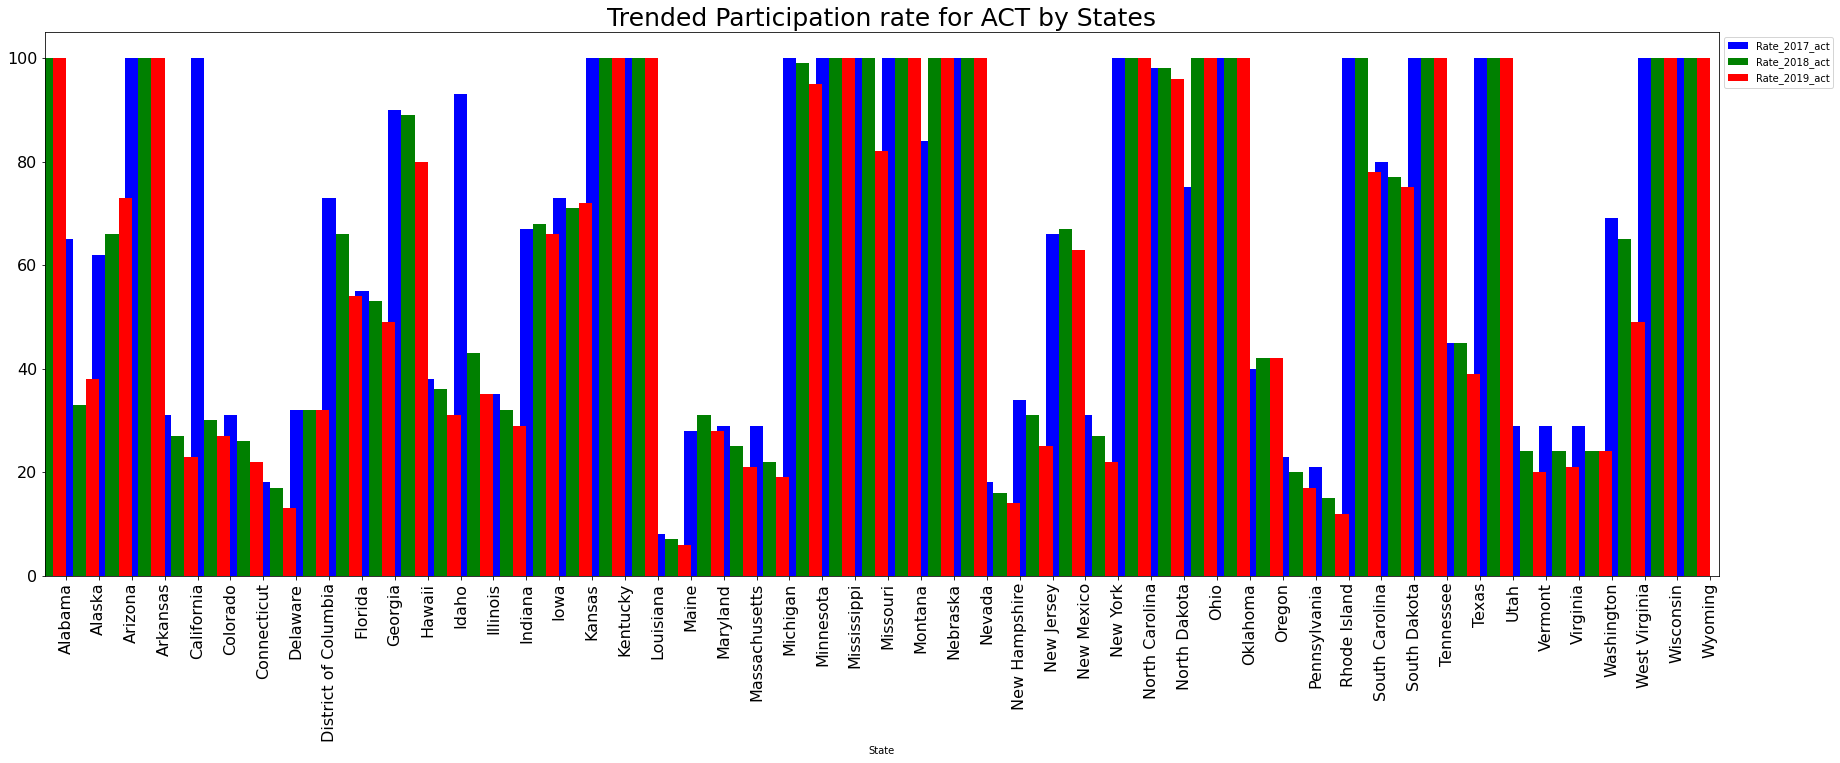

In [152]:
#Depict participation rate for ACT among states

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

act_merged.plot(kind='bar', x='State', y='Rate_2017_act', ax=ax, position=3, width=0.4, color='b')
act_merged.plot(kind='bar', x='State', y='Rate_2018_act', ax=ax, position=2, width=0.4, color='g')
act_merged.plot(kind='bar', x='State', y='Rate_2019_act', ax=ax, position=1, width=0.4, color='r')
plt.title("Trended Participation rate for ACT by States", fontsize=25)
plt.ylim([0,105])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.legend(bbox_to_anchor=(1,1));

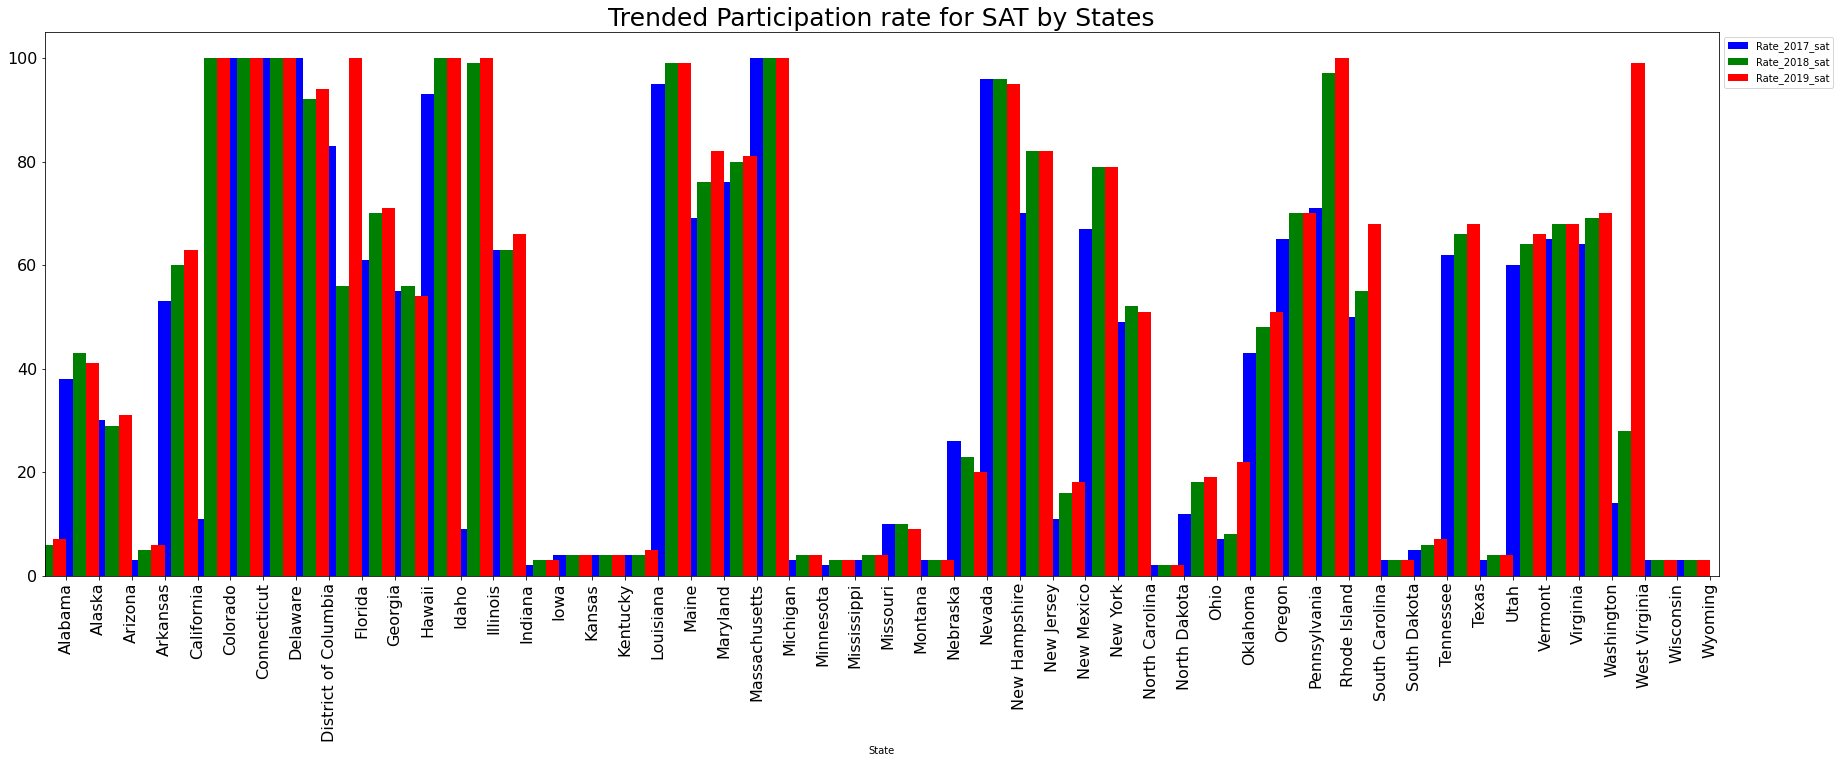

In [153]:
#Depict participation rate for ACT among states

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

sat_merged.plot(kind='bar', x='State', y='Rate_2017_sat', ax=ax, position=3, width=0.4, color='b')
sat_merged.plot(kind='bar', x='State', y='Rate_2018_sat', ax=ax, position=2, width=0.4, color='g')
sat_merged.plot(kind='bar', x='State', y='Rate_2019_sat', ax=ax, position=1, width=0.4, color='r')
plt.title("Trended Participation rate for SAT by States", fontsize=25)
plt.ylim([0,105])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.legend(bbox_to_anchor=(1,1));

## Correlation among different factors against SAT / ACT scores

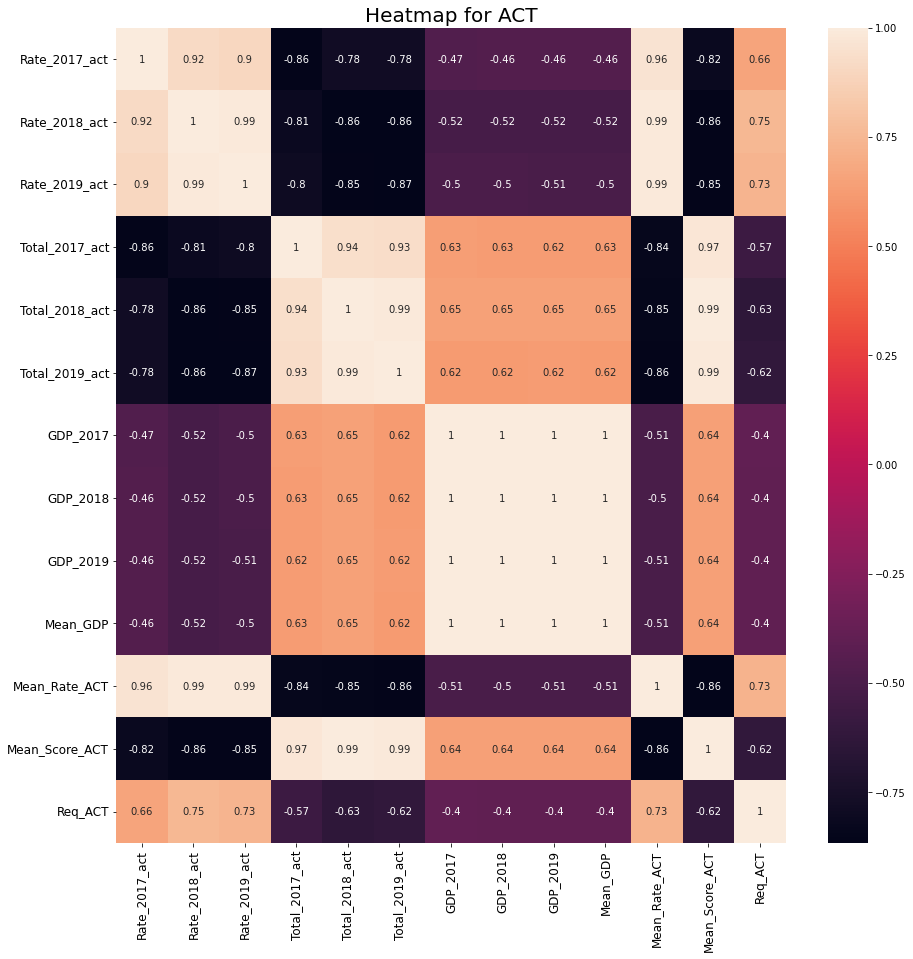

In [154]:
#For ACT
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap for ACT", fontsize=20)
sns.heatmap(act_merged.corr(),annot= True);

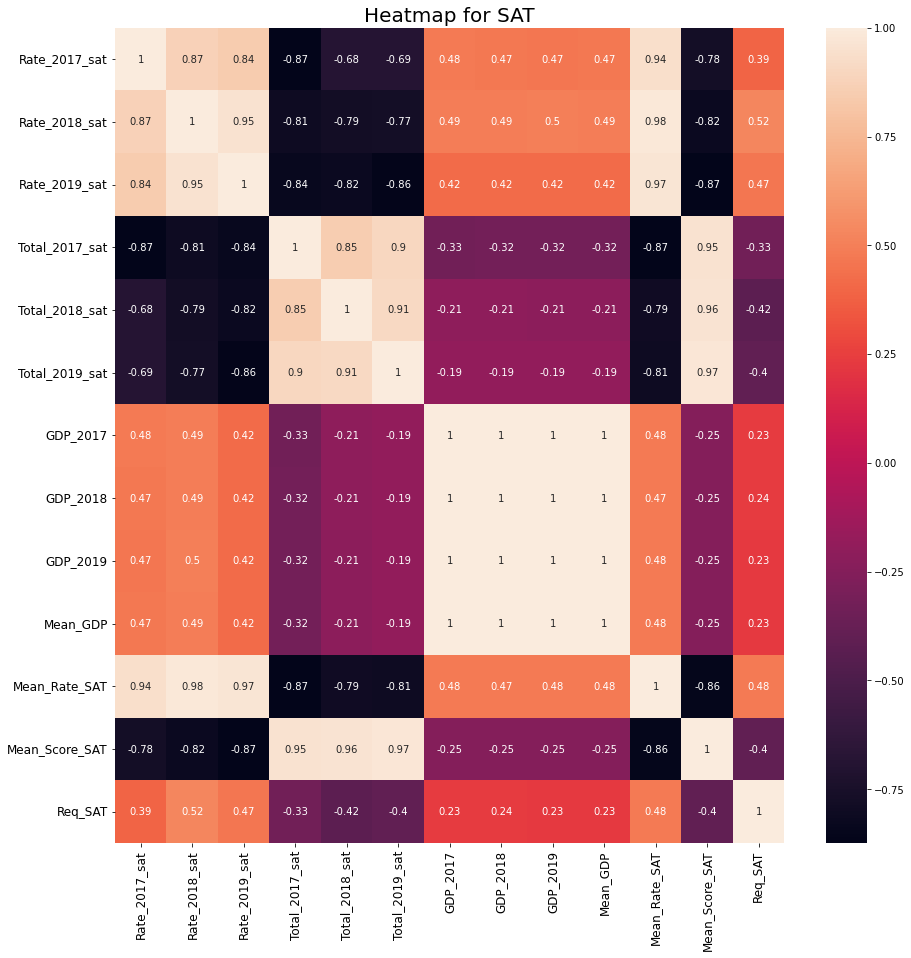

In [155]:
#For SAT
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap for SAT", fontsize=20)
sns.heatmap(sat_merged.corr(),annot= True);

## Insights

1) Some states have 100% participation rate which corroborate with our external data regarding states mandating ACT / SAT
<br>
<br>
2) For SAT, GDP has a positive correlation with Participation Rate but negative correlation with Total SAT Scores.
<br>
<br>
3) For ACT, it is the opposite. GDP has a negative correlation with Participation Rate but positive correlation with Total SAT Scores.
<br>
<br>
4) There is a similar trend amongst ACT and SAT, the Participation Rate has an inverse relationship with Total Scores.

### Conclusion (So far):
The Trended Participation rate among States charts has tallied with external data. However, the relationship between GDP and Participation Rate, GDP vis-à-vis Total Scores make for interesting readings.

## Relationship of GDP against ACT / SAT Scores

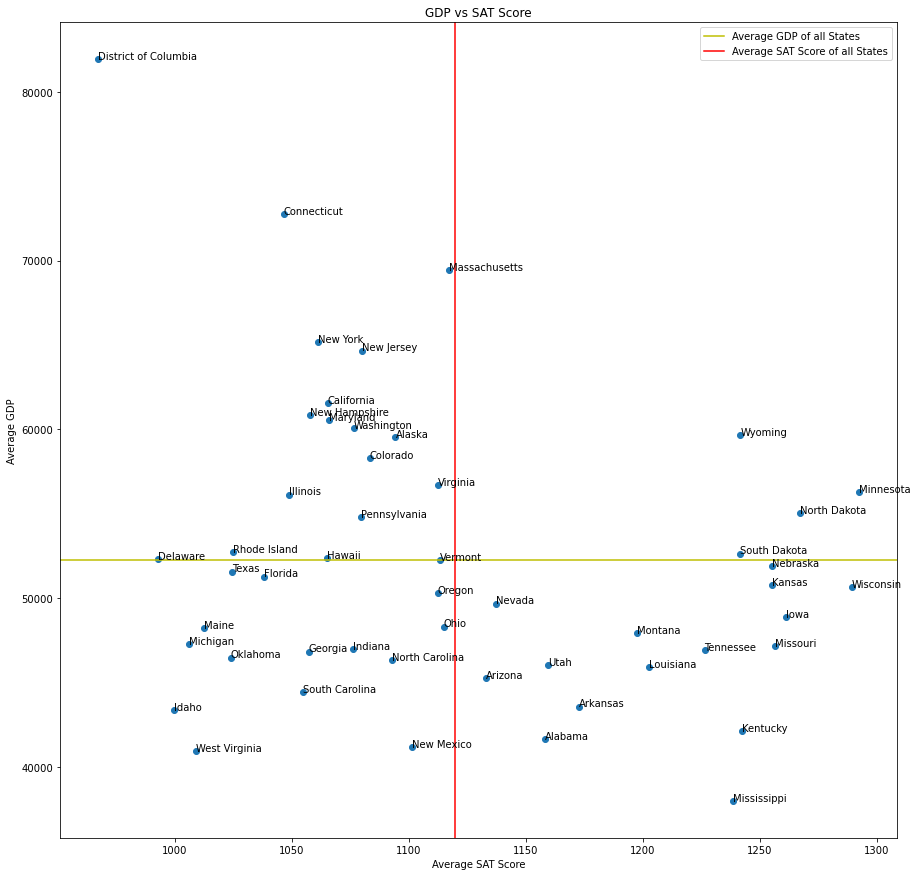

In [156]:
fig = plt.figure(figsize=(15,15))
plt.scatter(sat_merged['Mean_Score_SAT'], sat_merged['Mean_GDP'])
plt.axhline(y=sat_merged['Mean_GDP'].mean(), color='y', label = 'Average GDP of all States')
plt.axvline(x=sat_merged['Mean_Score_SAT'].mean(), color='r', label = 'Average SAT Score of all States')
plt.xlabel('Average SAT Score')
plt.ylabel('Average GDP')
plt.title('GDP vs SAT Score')
plt.legend()
annotations = sat_merged['State']

for i, label in enumerate(annotations):
    plt.annotate(label, (sat_merged['Mean_Score_SAT'][i], sat_merged['Mean_GDP'][i]));

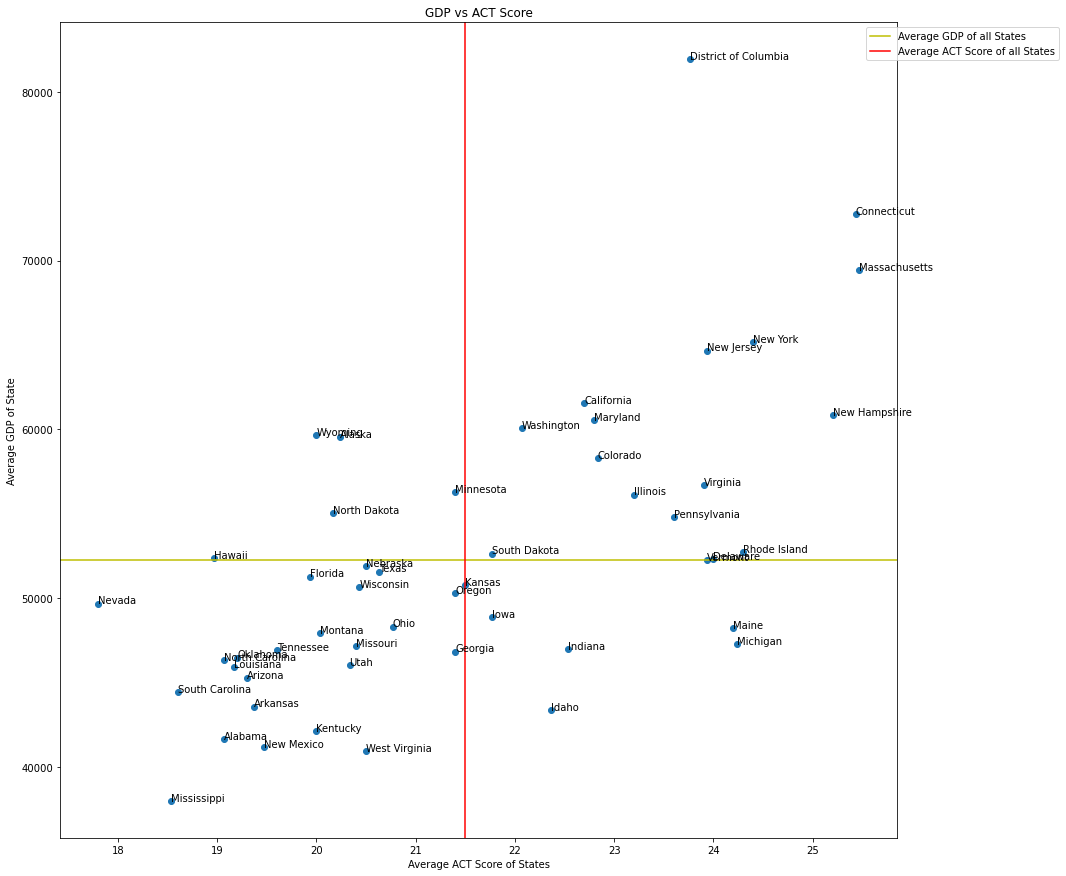

In [157]:
fig = plt.figure(figsize=(15,15))
plt.scatter(act_merged['Mean_Score_ACT'], act_merged['Mean_GDP'])
plt.axhline(y=act_merged['Mean_GDP'].mean(), color='y', label = 'Average GDP of all States')
plt.axvline(x=act_merged['Mean_Score_ACT'].mean(), color='r', label = 'Average ACT Score of all States')
plt.xlabel('Average ACT Score of States')
plt.ylabel('Average GDP of State')
plt.title('GDP vs ACT Score')
plt.legend(bbox_to_anchor=(1.2,1))
annotations = act_merged['State']

for i, label in enumerate(annotations):
    plt.annotate(label, (act_merged['Mean_Score_ACT'][i], act_merged['Mean_GDP'][i]));

In [158]:
sat_merged.head()

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_SAT,Mean_Score_SAT,Req_SAT
0,Alabama,5,6,7,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,6.0,1158.000000,0
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,41.0,1094.333333,0
2,Arizona,30,29,31,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,30.0,1133.000000,0
3,Arkansas,3,5,6,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,5.0,1172.666667,0
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,59.0,1065.333333,0


In [159]:
sat_merged[(sat_merged['Mean_Score_SAT'] < sat_merged['Mean_Score_SAT'].mean()) & \
          (sat_merged['Mean_GDP'] > sat_merged['Mean_GDP'].mean())]

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_SAT,Mean_Score_SAT,Req_SAT
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,41.0,1094.333333,0
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,59.0,1065.333333,0
5,Colorado,11,100,100,1201,1025,1024,55294.0,58471.0,61087.0,58284.0,70.0,1083.333333,1
6,Connecticut,100,100,100,1041,1053,1046,70163.0,73176.0,74930.0,72756.0,100.0,1046.666667,1
7,Delaware,100,100,100,996,998,985,50516.0,52839.0,53539.0,52298.0,100.0,993.000000,1
8,District of Columbia,100,92,94,950,977,975,79967.0,82512.0,83270.0,81916.0,95.0,967.333333,1
11,Hawaii,55,56,54,1085,1010,1100,51055.0,52174.0,53888.0,52372.0,55.0,1065.000000,0
13,Illinois,9,99,100,1115,1019,1013,53645.0,56512.0,58273.0,56143.0,69.0,1049.000000,1
20,Maryland,69,76,82,1060,1080,1058,59183.0,60630.0,61879.0,60564.0,76.0,1066.000000,0
21,Massachusetts,76,80,81,1107,1125,1120,66625.0,69517.0,72202.0,69448.0,79.0,1117.333333,0


In [160]:
act_merged[(act_merged['Mean_Score_ACT'] < act_merged['Mean_Score_ACT'].mean()) & \
          (act_merged['Mean_GDP'] > act_merged['Mean_GDP'].mean())]

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Total_2017_act,Total_2018_act,Total_2019_act,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Score_ACT,Req_ACT
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0,59567.0,45.0,20.233333,0
11,Hawaii,90,89,80,19.0,18.9,19.0,51055.0,52174.0,53888.0,52372.0,86.0,18.966667,1
23,Minnesota,100,99,95,21.5,21.3,21.4,54317.0,56568.0,57946.0,56277.0,98.0,21.400000,0
34,North Dakota,98,98,96,20.3,20.3,19.9,52455.0,55511.0,57205.0,55057.0,97.0,20.166667,1
50,Wyoming,100,100,100,20.2,20.0,19.8,57126.0,60353.0,61571.0,59683.0,100.0,20.000000,1


## Conclusion (SAT)

GDP and Participation rate have a positive correlation. With affluence concentrated in the Northeastern United States, there is a higher participation rate in SAT. Having said that, most of the States with SAT scores lower than average SAT score also fall in the Northeast region. Therefore, we should focus on these States, such as New York, Pennsylvania and Virginia to plug the gap in SAT scores.

## Conclusion (ACT)

GDP and Participation rate have a negative correlation. States in the Upper Midwest have a lower GDP per capital relative to the Northeastern region. Therefore, we should focus on states in this region to provide educational services relating to ACT scores.